# Analisi dati preliminare 10 marzo 2021

breve analisi dati modello diamico

In [1]:
import os
import numpy as np
import pandas as pd

ALL_FILES = [
    'p_oscillazioni_NNx10.csv'
]
BASE_PATH = os.getcwd()
DATA_PATH = os.path.join(os.getcwd(), '../../dati')

data_csv = pd.read_csv(os.path.join(DATA_PATH, ALL_FILES[0]), sep=',')

T = np.array([(data_csv[line]/10).mean() for line in data_csv])
err_T = np.array([(data_csv[line]/10).std()/np.sqrt(data_csv[line].size) for line in data_csv])

M = np.array([261.499, 535.07275, 650.44700, 796.66900, 1035.6340, 393.09100, 916.85700])/1000
err_M = np.array([0.004, 0.008, 0.012, 0.012, 0.016, 0.008, 0.016])/(1000*np.sqrt(3))

In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline
%config InlineBackend.figure_format='retina'

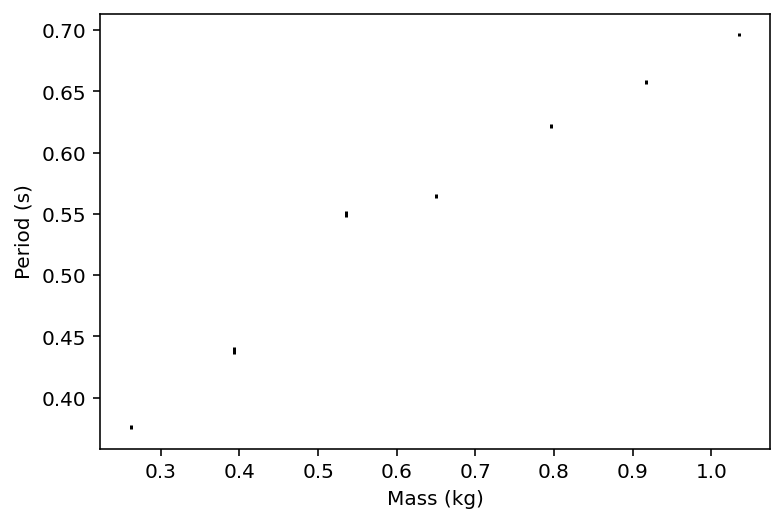

In [3]:

plt.errorbar(M, T, yerr=err_T, xerr=err_M, fmt='k,')
plt.xlabel('Mass (kg)')
plt.ylabel('Period (s)')
plt.show()

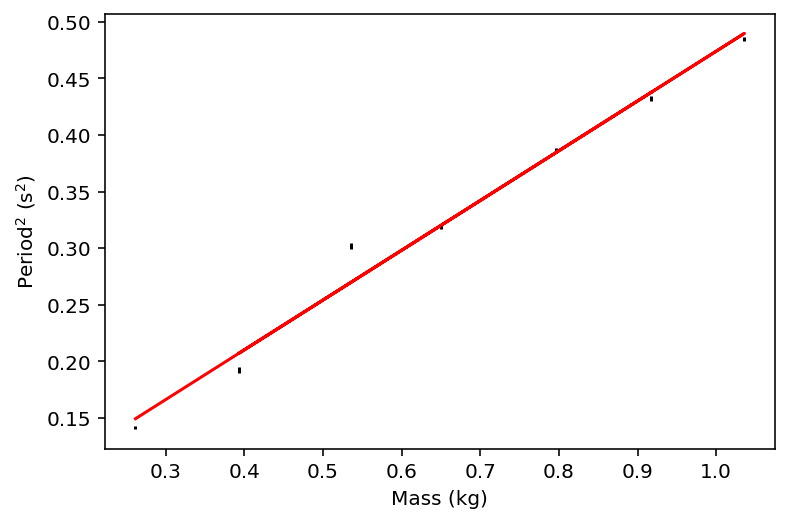

In [4]:
T2 = T**2
err_T2 = 2*T*err_T

def f(x, a, b):
    return a*x+b

plt.errorbar(M, T2, yerr=err_T2, xerr=err_M, fmt=',k')
popt, pcov = curve_fit(f, M, T2)
plt.plot(M, f(M, *popt), 'r-')
plt.xlabel('Mass (kg)')
plt.ylabel('Period$^2$ (s$^2$)')
plt.show()

# Getting formatted output for latex and files

Using `csv` to format csv tables.

Using `latex` custom library for formatting tables.

In [5]:
# MISC_PATH = os.path.join(os.getcwd(), '../../misc')
# OUTPUT_FILES = [
#     'p_oscillazioni_computed'
# ]
#
# import csv
# 
# with open(os.path.join(MISC_PATH, OUTPUT_FILES[0] + '.csv'), 'w') as output:
#     writer = csv.writer(output, delimiter=',')
#     writer.writerow(['M', 'err_M', 'T', 'err_T'])
#     for i in range(0, len(T)):
#         writer.writerow([M[i], err_M[i], T[i], err_T[i]])

In [6]:
# import latex
# latex.set_folder(os.getcwd())
# latex.open_table_file('oscillazioni.tex')

Opening output file /Users/massimosotgia/Desktop/uni_at_DIFI/Lab_C03/esperienza_5__Legge_Hooke/analisi_dati/macro/../../misc/oscillazioni.tex...


<_io.TextIOWrapper name='/Users/massimosotgia/Desktop/uni_at_DIFI/Lab_C03/esperienza_5__Legge_Hooke/analisi_dati/macro/../../misc/oscillazioni.tex' mode='w' encoding='UTF-8'>

In [7]:
# M

array([0.261499  , 0.53507275, 0.650447  , 0.796669  , 1.035634  ,
       0.393091  , 0.916857  ])

In [8]:
# err_M

array([2.30940108e-06, 4.61880215e-06, 6.92820323e-06, 6.92820323e-06,
       9.23760431e-06, 4.61880215e-06, 9.23760431e-06])

In [9]:
# fmt_M = [latex.format_number(val, precision=6, threshold=0.1) for val in M]
# fmt_err_M = [latex.format_number(val, precision=0, threshold=10e-6) for val in err_M]
# fmt_err_M

['2 \\times 10^{-6}',
 '5 \\times 10^{-6}',
 '7 \\times 10^{-6}',
 '7 \\times 10^{-6}',
 '9 \\times 10^{-6}',
 '5 \\times 10^{-6}',
 '9 \\times 10^{-6}']

In [10]:
# err_T 

array([0.00146401, 0.00244518, 0.00195619, 0.00178916, 0.0010729 ,
       0.0030625 , 0.00172691])

In [11]:
# for i in range(0, len(M)):
#     latex.write_table_row([M[i], err_M[i], T[i], err_T[i], T2[i], err_T2[i]])